# Palmer Penguins Classification with Neural Networks

This notebook aims where to explore the Palmer Penguins dataset using neural network techniques for classification. Similar to our previous machine learning approach, the primary goal of this project is to develop classification models capable of accurately predicting penguin species based on various morphological measurements and environmental factors.


This time we delve into the domain of neural networks to address the classification problem. We construct models employing various neural network techniques and subsequently compare their performance. Through this exploration, we aim to discern the efficacy of different neural network approaches in accurately predicting penguin species based on the provided dataset.

Before diving into the project, we'll import the necessary libraries. We'll utilize Pandas for creating a DataFrame to handle the Palmer Penguins dataset, scikit-learn for data preprocessing tasks, Keras for constructing the neural networks, and Matplotlib along with Seaborn for data visualization purposes.

Let's proceed by importing these libraries.

In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import seaborn as sns
import matplotlib.pyplot as plt

We preprocess the dataset using the same procedures as implemented in the previous notebook.

In [9]:
dataframe = pd.read_csv('penguins.csv')
dataframe_cleared = dataframe.dropna()

categorical_columns = ['island', 'sex']
categorical_features = dataframe_cleared[categorical_columns]

dataframe_encoded = dataframe_cleared.copy()
encoder = preprocessing.LabelEncoder()

for col in categorical_columns:
    dataframe_encoded[col] = encoder.fit_transform(dataframe_cleared[col])

numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

scaler = preprocessing.MinMaxScaler()
dataframe_encoded[numerical_features] = scaler.fit_transform(dataframe_encoded[numerical_features])
df = dataframe_encoded

species_codes = {"Adelie": 0, "Chinstrap": 1, "Gentoo": 2}
df['species'] = df['species'].map(species_codes)
df['year'] = df['year'] - 2007

In [10]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,0.254545,0.666667,0.152542,0.291667,1,0
1,0,2,0.269091,0.511905,0.237288,0.305556,0,0
2,0,2,0.298182,0.583333,0.389831,0.152778,0,0
4,0,2,0.167273,0.738095,0.355932,0.208333,0,0
5,0,2,0.261818,0.892857,0.305085,0.263889,1,0
...,...,...,...,...,...,...,...,...
339,1,1,0.861818,0.797619,0.593220,0.361111,1,2
340,1,1,0.414545,0.595238,0.508475,0.194444,0,2
341,1,1,0.636364,0.607143,0.355932,0.298611,1,2
342,1,1,0.680000,0.702381,0.644068,0.388889,1,2


In [11]:
X = df.drop(columns=['species'])
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

The initial model we'll build is straightforward: it consists of an input layer, a hidden layer employing the ReLU activation function, and an output layer with three neurons, each representing one of the possible classes. We utilize the softmax activation function in the output layer to generate a probability distribution for our class predictions. We opt for the Adam optimizer, and our loss function of choice is sparse categorical crossentropy. This selection is appropriate as we're dealing with a multi-class classification problem where the target labels are provided as integers, rather than being one-hot encoded.

In [12]:
nn_model = Sequential()
nn_model.add(Input(shape=(7,)))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(3, activation='softmax'))

nn_model.compile(optimizer=Adam(learning_rate=0.01), loss=sparse_categorical_crossentropy, metrics=['accuracy'])

In [13]:
nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179 (716.00 B)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 0 (0.00 B)

The model summary indicates a total of 179 trainable parameters. The relatively low number of trainable parameters suggests that the model is relatively simple and has a shallow architecture

In [14]:
print("Training")
nn_model.fit(X_train, y_train, epochs=10)

print("\nTesting")
loss, accuracy = nn_model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Training
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4784 - loss: 1.0290
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7090 - loss: 0.8141 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6741 - loss: 0.7008 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7524 - loss: 0.5754 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7525 - loss: 0.4789 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7995 - loss: 0.3719 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9012 - loss: 0.3011 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9356 - loss: 0.2815 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9627 - loss: 0.2632 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9739 - loss: 0.1993 

Testing
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9017 - loss: 0.2217
Loss: 0.2029903382062912
Accuracy: 0.8999999761581421


The model achieves 97% accuracy on the training data but drops to 90% accuracy on the test data.
The noticeable disparity between the training and test accuracies suggests that the model may be overfitting to the training data. Overfitting occurs when the model learns to memorize the training data's patterns rather than generalizing well to unseen data.

The subsequent model aims to address this issue by increasing the number of neurons in the hidden layer and incorporating a dropout layer. This adjustment is intended to enhance the model's ability to generalize by introducing more complexity while also mitigating overfitting through the dropout mechanism.

In [15]:
nn_model2 = Sequential([
    Input(shape=(7,)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

nn_model2.compile(optimizer=Adam(learning_rate=0.01), loss=sparse_categorical_crossentropy, metrics=['accuracy'])

In [16]:
nn_model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355 (1.39 KB)

 Trainable params: 355 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

The model summary reveals an increase in trainable parameters, with the current model having 355 parameters compared to the previous model's 179.
The significant increase in trainable parameters indicates that the current model is more complex than the previous one. The introduction of additional neurons in the hidden layer and the incorporation of a dropout layer contribute to this higher parameter count. This increased complexity allows the model to capture more intricate patterns in the data, potentially improving its performance and ability to generalize.

In [17]:
print("Training")
nn_model2.fit(X_train, y_train, epochs=10)

print("\nTesting")
loss, accuracy = nn_model2.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Training
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.4401 - loss: 1.1978
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6648 - loss: 0.8978 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 0.7897 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7663 - loss: 0.5951 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8026 - loss: 0.5076 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.4987 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8202 - loss: 0.4124 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8457 - loss: 0.4050 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.3461 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8801 - loss: 0.3175 

Testing
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8555 - loss: 0.3132
Loss: 0.28893744945526123
Accuracy: 0.8600000143051147


 The model achieved 88% accuracy on the training data and 85% accuracy on the testing data, compared to the previous model's 97% and 90%, respectively. Despite the increase in complexity and parameter count, the current model exhibits a decrease in accuracy on both the training and testing datasets compared to the previous model, but the discrepancy between training and testing results is much lower, proving it has a better generalization capability.

The next model builds upon the previous one by incorporating L2 regularization on the hidden layer. This regularization technique penalizes large weights in the model, thereby encouraging simpler models and helping to prevent overfitting. By adding L2 regularization, we aim to further improve the model's generalization performance by reducing its sensitivity to the training data's noise and fluctuations.

In [18]:
nn_model3 = Sequential([
    Input(shape=(7,)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

nn_model3.compile(optimizer=Adam(learning_rate=0.01), loss=sparse_categorical_crossentropy, metrics=['accuracy'])

In [19]:
nn_model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355 (1.39 KB)

 Trainable params: 355 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
print("Training")
nn_model3.fit(X_train, y_train, epochs=10)

print("\nTesting")
loss, accuracy = nn_model3.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Training
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.3723 - loss: 1.1886
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6638 - loss: 0.8916 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7262 - loss: 0.7067 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7488 - loss: 0.6322 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7315 - loss: 0.5814 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8133 - loss: 0.4648 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8247 - loss: 0.4210 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9004 - loss: 0.3551 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9347 - loss: 0.3217 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3364 

Testing
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9170 - loss: 0.2657
Loss: 0.2523423135280609
Accuracy: 0.9200000166893005


The model yielded an interesting outcome, with 85% accuracy on the training dataset and 92% accuracy on the testing dataset.
This discrepancy in performance, where the testing accuracy surpasses the training accuracy, is somewhat unexpected but promising. It suggests that the regularization technique, specifically L2 regularization, effectively mitigated overfitting and allowed the model to generalize better to unseen data. This result underscores the importance of regularization in improving model generalization performance and highlights the effectiveness of L2 regularization in this particular scenario.

The final improvement strategy involves utilizing a heatmap to examine the dataset. By visualizing the data with a heatmap, we gain insights into the interrelationships and correlations among the features. This visualization enables us to identify strong correlations between variables, aiding in feature selection. In the subsequent model, features exhibiting a correlation close to zero with the target label will be excluded.

<Axes: title={'center': 'Pearson Correlation of Features'}>

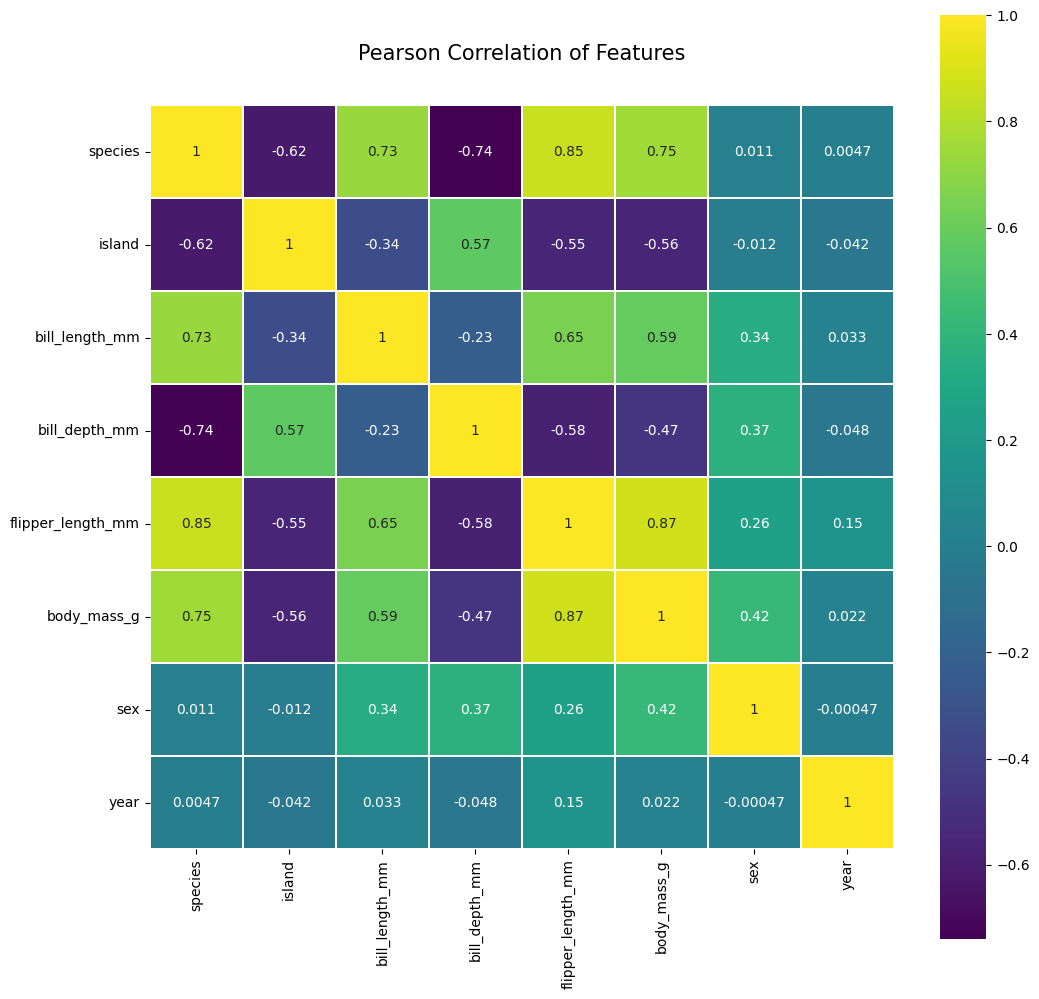

In [21]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Observing the heatmap, we discern that the 'sex' and 'year' features exhibit minimal correlations with the target variable, species. Hence, we opt to construct a model excluding these features. Their inclusion may introduce noise or extraneous information to the neural network, potentially impeding its performance rather than enhancing it.

In [22]:
X = df.drop(columns=['species', 'sex', 'year'])
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [23]:
nn_model4 = Sequential([
    Input(shape=(5,)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(3, activation='softmax')
])

nn_model4.compile(optimizer=Adam(learning_rate=0.01), loss=sparse_categorical_crossentropy, metrics=['accuracy'])

In [24]:
nn_model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

The model's parameter count of 147 marks it as the smallest model implemented thus far.

In [25]:
print("Training")
nn_model4.fit(X_train, y_train, epochs=10)

print("\nTesting")
loss, accuracy = nn_model4.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Training
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.1803 - loss: 1.1130    
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7752 - loss: 0.8433 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.6787 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7632 - loss: 0.5630 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7865 - loss: 0.4560 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8138 - loss: 0.3861 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8662 - loss: 0.3174 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8855 - loss: 0.3209 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9238 - loss: 0.2578 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9643 - loss: 0.2392 

Testing
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9693 - loss: 0.2502
Loss: 0.23190733790397644
Accuracy: 0.9700000286102295


The model's remarkable performance is noteworthy, boasting a training accuracy of 96.5% and a testing accuracy of 97%. Notably, this model achieves exceptional accuracy while maintaining consistency between training and testing performance, with minimal discrepancy observed. This outcome underscores the efficacy of thoughtful feature selection. Despite its smaller size, the model demonstrates superior generalization capability compared to the previous, more complex models.

In [26]:
nn_model4.save('models/neural_net_model.keras')

Finally, we proceed to save the last model for future use.